**importation des librairies necessaires**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**chargement du jeu de donnée**



In [7]:
data = pd.read_csv('/content/drive/MyDrive/timeSerie/Final_Bitcoin_dataset.csv')
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Close,High,Low,Open,Volume,fear_greed
0,2019-03-15,3960.911133,3968.542969,3914.015381,3926.663330,9394210605,55.0
1,2019-03-16,4048.725830,4077.036377,3961.657471,3963.900146,9856166973,54.0
2,2019-03-17,4025.229004,4054.122070,4006.411133,4047.719482,8221625400,58.0
3,2019-03-18,4032.507324,4071.556641,4009.117188,4029.968506,9646954186,56.0
4,2019-03-19,4071.190186,4082.216064,4023.812500,4032.691895,9344919956,56.0


**quelques transformations de colonnes**

La **volatilité** représente l’ampleur des fluctuations de prix d’un actif sur une période donnée.

**Cible secondaire** : On pourrez aussi prédire la volatilité future (utile pour les options ou le risque.Les traders se basent sur cette métrique pour ajuster leurs stratégies).

In [8]:
data['Volatility'] = (data['High'] - data['Low']) / data['Low'] * 100

Le **RSI** est un oscillateur de momentum qui mesure la vitesse et l’ampleur des variations de prix sur une période donnée (généralement 14 jours).
Le RSI n’est pas simplement une transformation linéaire des prix, il capture le **momentum** du marché, ce qui peut être une information complémentaire précieuse.

**-->**Si RSI > 70 → Bitcoin est en zone de surachat → Risque de diminution du prix(Ce qui incite les traders à vendre).

**-->**Si RSI < 30 → Bitcoin est en zone de survente → Potentiel rebond haussier(signalant une opportunité d'achat potentiel)

**Exemple** :

**~**Si on entraîne un modèle avec seulement Close, High, Low, Open, il ne comprend que la structure des prix.

**~**Avec RSI comme feature, le modèle a une mesure directe de la dynamique du marché.

In [9]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data

,Date,Close,High,Low,Open,Volume,fear_greed,Volatility,RSI
0,2019-03-15,3960.911133,3968.542969,3914.015381,3926.663330,9394210605,55.0,1.393137,NaN
1,2019-03-16,4048.725830,4077.036377,3961.657471,3963.900146,9856166973,54.0,2.912390,NaN
2,2019-03-17,4025.229004,4054.122070,4006.411133,4047.719482,8221625400,58.0,1.190865,NaN
3,2019-03-18,4032.507324,4071.556641,4009.117188,4029.968506,9646954186,56.0,1.557436,NaN
4,2019-03-19,4071.190186,4082.216064,4023.812500,4032.691895,9344919956,56.0,1.451448,NaN
...,...,...,...,...,...,...,...,...,...
2188,2025-03-11,82862.210938,83577.757812,76624.250000,78523.875000,54702837196,24.0,9.074814,43.342484
2189,2025-03-12,83722.359375,84358.578125,80635.250000,82857.375000,40353484454,34.0,4.617494,49.230449
2190,2025-03-13,81066.703125,84301.695312,79931.851562,83724.921875,31412940153,45.0,5.466962,45.758951
2191,2025-03-14,83969.101562,85263.289062,80797.562500,81066.992188,29588112414,27.0,5.527056,49.555716


Pour calculer la première valeur du RSI, il faut 14 valeurs de gains et pertes(14 premiers jours).

 Donc, pour les 13 premières lignes, la moyenne mobile ne peut pas être calculée, et elles restent NaN.

# **Colonne**--------**Description**

**Date**	: Date de l'enregistrement des données (format YYYY-MM-DD).

**Close** : Prix de clôture du Bitcoin à cette date.

**High** : Prix le plus haut atteint par le Bitcoin durant cette journée.

**Low** :	Prix le plus bas atteint par le Bitcoin durant cette journée.

**Open** : Prix d'ouverture du Bitcoin à cette date.

**Volume**	: Volume total de Bitcoin échangé durant cette journée.

**fear_greed** :	Indice de sentiment du marché basé sur la peur et la cupidité.

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2193 non-null   datetime64[ns]
 1   Close       2193 non-null   float64       
 2   High        2193 non-null   float64       
 3   Low         2193 non-null   float64       
 4   Open        2193 non-null   float64       
 5   Volume      2193 non-null   int64         
 6   fear_greed  2192 non-null   float64       
 7   Volatility  2193 non-null   float64       
 8   RSI         2180 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 154.3 KB
None


In [11]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,2193,2022-03-14 23:59:59.999999744,2019-03-15 00:00:00,2020-09-13 00:00:00,2022-03-15 00:00:00,2023-09-14 00:00:00,2025-03-15 00:00:00,NaN
Close,2193.0,34577.254465,3960.911133,11584.93457,29176.916016,49368.847656,106146.265625,24341.695149
High,2193.0,35296.671367,3968.542969,11800.064453,29498.009766,50797.164062,109114.882812,24846.611684
Low,2193.0,33750.217823,3914.015381,11296.993164,28720.271484,47925.855469,105291.734375,23769.740067
Open,2193.0,34542.527953,3926.66333,11548.719727,29169.074219,49413.480469,106147.296875,24329.020512
Volume,2193.0,31835523422.981304,5331172801.0,18927080224.0,27773333680.0,39006849170.0,350967941479.0,19321455743.148724
fear_greed,2192.0,49.855839,5.0,30.0,50.0,70.0,95.0,22.051954
Volatility,2193.0,4.529621,0.359616,2.307852,3.653107,5.590037,63.138656,3.680877
RSI,2180.0,53.410094,4.699489,40.76242,52.581676,65.973856,99.219494,18.076001


**.Close** (Prix de Clôture) :

**~**Moyenne : 34 577 $ (Prix moyen du Bitcoin sur la période).

**~**Étendue : De 3960 à 106146 $ montrant une forte volatilité historique.

**~**Écart-type : 24 341 $, indiquant une grande dispersion autour de la moyenne.

**.Volume**

**~**Moyenne : Le volume moyen des transactions est de 31,835,520,000 (environ 31.8 milliards).

**~**Min : Le volume minimum est 5.33 milliards, ce qui représente probablement une période de faible activité.

**~**Max : Le volume maximum est de 350.97 milliards, indiquant des pics d'activité importants(Le 26 février 2021, le marché du Bitcoin a connu une volatilité notable, marquée par une baisse significative de son prix. Cette chute est survenue dans un contexte où, quelques jours auparavant, le Bitcoin avait atteint un nouveau record en dépassant les 50 000 dollars le 16 février 2021.

**.Volatility** (Volatilité Journalière)

**~**Moyenne : 4.53% (variation journalière moyenne entre High et Low).

**~**Max : 63.13% (journée de trading extrêmement volatile).

Ce jour correspond au 12 mars 2020, surnommé le **jeudi noir** dans la communauté des cryptomonnaies, le Bitcoin a subi une chute spectaculaire de près de 50 % de sa valeur en une seule journée. Le prix du Bitcoin est passé d'environ 7 900 dollars à 4 860 dollars, reflétant une panique généralisée sur les marchés financiers dûe à la pandémie de **Covid-19**

In [12]:
for lag in [1, 3, 7, 15, 30, 60, 61, 70]:
    data[f'fear_greed_lag_{lag}'] = data['fear_greed'].shift(lag)
    correlation_lag = data[['Close', f'fear_greed_lag_{lag}']].corr()
    print(f"Corrélation avec un décalage de {lag} jours :\n", correlation_lag, "\n")


Corrélation avec un décalage de 1 jours :
                      Close  fear_greed_lag_1
Close             1.000000          0.330613
fear_greed_lag_1  0.330613          1.000000 

Corrélation avec un décalage de 3 jours :
                      Close  fear_greed_lag_3
Close             1.000000          0.335399
fear_greed_lag_3  0.335399          1.000000 

Corrélation avec un décalage de 7 jours :
                      Close  fear_greed_lag_7
Close             1.000000          0.346384
fear_greed_lag_7  0.346384          1.000000 

Corrélation avec un décalage de 15 jours :
                       Close  fear_greed_lag_15
Close              1.000000           0.367282
fear_greed_lag_15  0.367282           1.000000 

Corrélation avec un décalage de 30 jours :
                       Close  fear_greed_lag_30
Close              1.000000           0.396577
fear_greed_lag_30  0.396577           1.000000 

Corrélation avec un décalage de 60 jours :
                       Close  fear_greed_la

**Analyse univariée**

In [15]:
def process_and_plot_histograms(df):
    # Vérification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Liste des colonnes numériques à visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed']
    # Vérification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Création des histogrammes avec statistiques et polygone de fréquence
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(2, 3, i)  # 2 lignes, 3 colonnes pour les subplots
        data = df[col].dropna()
        # Histogramme
        counts, bins, _ = plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=False)
        # Polygone de fréquence
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red', label='Polygone de fréquence')
        # Calcul des statistiques
        mean_value = np.mean(data)
        std_dev = np.std(data)
        variance = np.var(data)
        median_value = np.median(data)
        min_value = np.min(data)
        max_value = np.max(data)
        # Ajout des statistiques sur le graphe
        stats_text = (f"Moyenne: {mean_value:.2f}\nÉcart-type: {std_dev:.2f}\nVariance: {variance:.2f}\n"
                      f"Médiane: {median_value:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}")
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.legend()
    plt.tight_layout()
    plt.show()

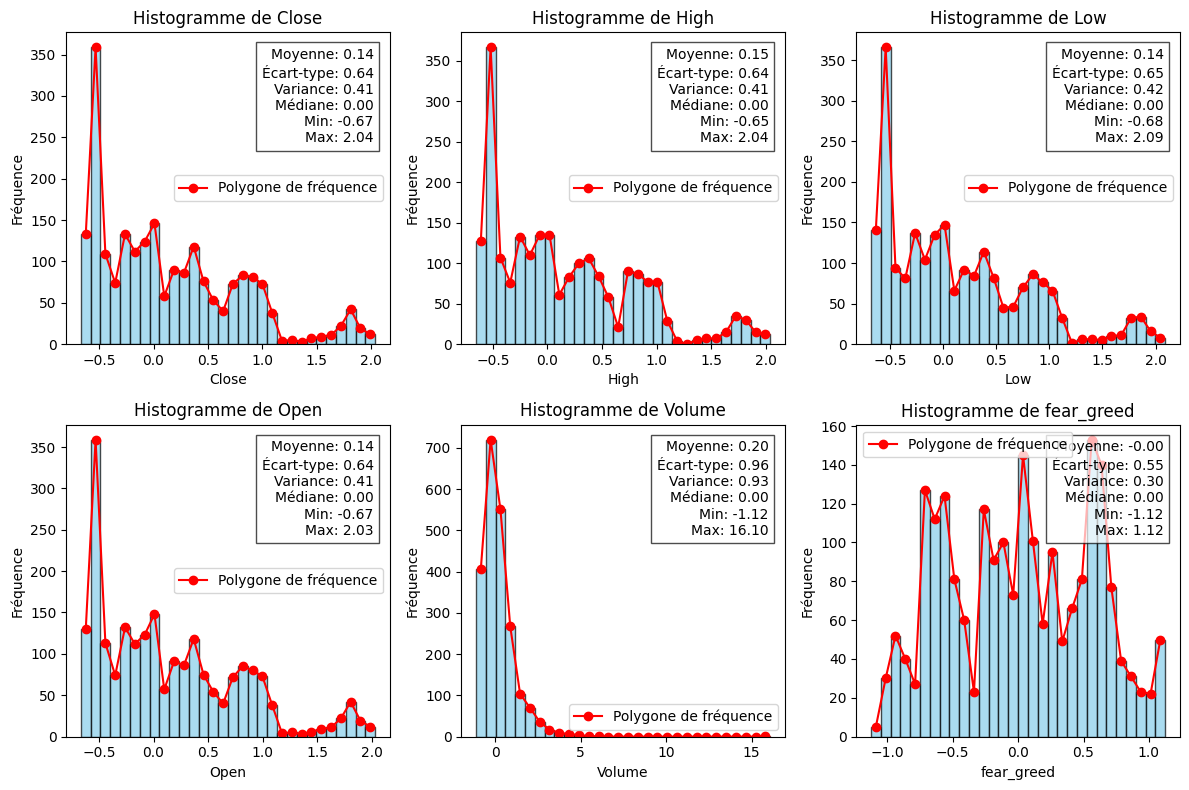

None


In [16]:
result = process_and_plot_histograms(data)
print(result)

**INTERPRETATION**

Les polygones de fréquence des colonnes Close, High, Low, et Open sont pratiquement identiques, ce qui reflète une distribution similaire de ces variables. Ce phénomène se vérifie tant graphiquement qu'à travers les calculs statistiques, car leurs moyennes, écarts-types, valeurs minimales, maximales, médianes, et variances sont presque identiques.

De plus, toutes ces colonnes présentent une distribution asymétrique, à l'exception de la colonne fear_greed. En effet, pour cette dernière, la médiane est égale à 50 et la moyenne (ou espérance) est de 49,86. Bien que le mode ne soit pas calculé ici, on peut en déduire que la distribution de fear_greed est relativement symétrique, puisque la médiane, la moyenne et le mode se trouvent très proches l'un de l'autre.

**📈 Le sentiment du marché (Fear & Greed) semble avoir un effet retardé sur le prix du Bitcoin, avec un délai optimal d’environ 30 jours. C'est à dire que son impact met plusieurs jours à se répercuter sur le marché !**

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Prix Bitcoin
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['Close'], name="Bitcoin Price", line=dict(color='blue')),
    secondary_y=False,
)

# Fear & Greed
fig.add_trace(
    go.Scatter(x=data['Date'], y=data['fear_greed'], name="Fear & Greed", line=dict(color='red', dash='dot')),
    secondary_y=True,
)

fig.update_layout(
    title="Bitcoin Price vs Fear & Greed Index",
    hovermode="x unified"  # Affiche les deux valeurs au survol
)

fig.show()

Le **RobustScaler** est une méthode de normalisation des données particulièrement adaptée aux jeux de données contenant des outliers comme les données financières.

**Principe :**

**-->**Centre les données autour de la médiane (au lieu de la moyenne pour StandardScaler).

**-->**Met à l'échelle en utilisant l'écart interquartile (IQR) (au lieu de l'écart-type).

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

features_to_scale = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility']

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

<Axes: >

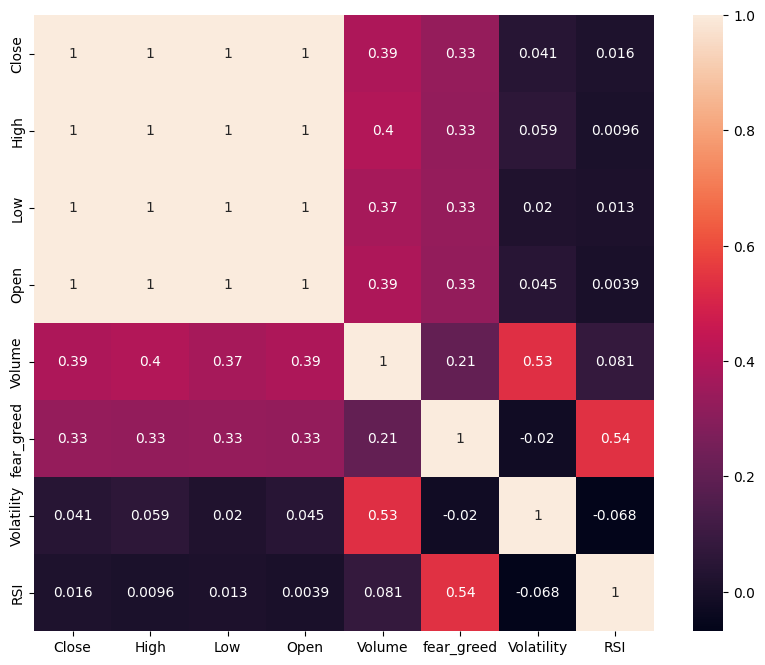

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed', 'Volatility', 'RSI']].corr(), annot=True)

**Corrélations entre les prix (Close, High, Low, Open) :**

Les prix de clôture(target variable), les prix les plus élevés(High), les prix les plus bas(Low) et les prix d'ouverture(Open) sont fortement corrélés . Cela est logique, car les prix des actifs financiers ont tendance à évoluer ensemble.

**Corrélations avec le volume :**

**~**Le volume a une corrélation modérée (0.37 à 0.4) avec les prix. Cela suggère que les variations de prix sont souvent accompagnées de changements de volume.

**~**Le volume a une corrélation assez forte (0.53) avec la volatilité.Cela signifie que les périodes de forte volatilité sont souvent associées à un volume de transactions élevé (logique car les investisseurs s'empressent de vendre leurs actifs).

**Corrélations avec l'indice fear_greed :**

**~**L'indice fear_greed a une corrélation de 0.33 avec le prix de l'actif. Il y a donc une légère influence du sentiment du marché sur le prix(mais pas **instantanément**).

**Corrélation avec la volatilité :**

**~**La volatilité a une faible corrélation (0.02 à 0.059) avec les prix. Cela indique que les changements de prix ne sont pas forcément en rapport avec la volatilité.